# NAME:AAKASH SHYAMLAL GUPTA

# TASK NO 1: Iris Flower Classifcation


# Importing Libraries


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
from sklearn.datasets import load_iris


In [2]:
iris=load_iris()

# Load Dataset

In [3]:
iris=pd.read_csv('iris.csv')

# Analyze & Visualize the dataset

In [4]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
iris.shape

(150, 5)

In [7]:
iris.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [8]:
iris.isnull().any()

SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

In [9]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
iris.duplicated().sum()

3

In [11]:
iris=iris.drop_duplicates()

In [12]:
iris.duplicated().sum()

0

In [13]:
iris.shape

(147, 5)

In [14]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [15]:
iris['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: Species, dtype: int64

# Visualization

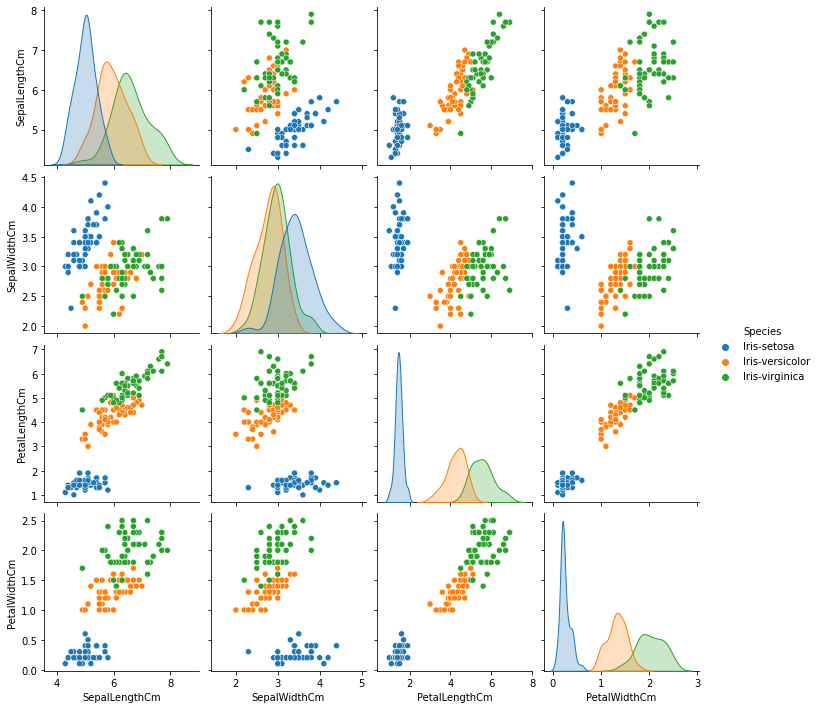

In [16]:
sns.pairplot(data=iris,hue='Species')

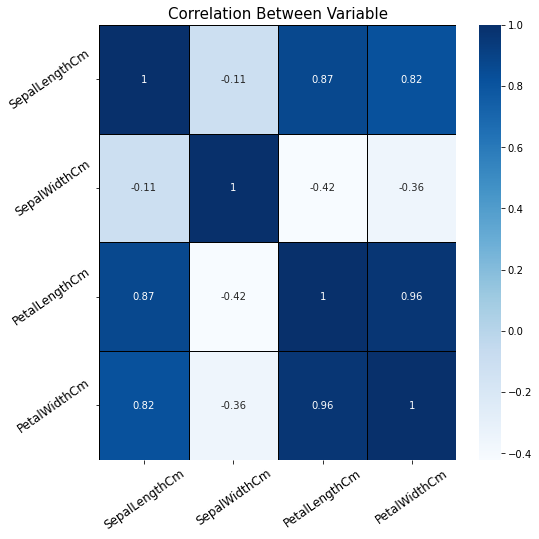

In [17]:
corr=iris.corr()
plt.figure(figsize=(8,8))
sns.heatmap(data=corr,annot=True,cmap='Blues',linewidth=1,linecolor='Black')
plt.title("Correlation Between Variable",size=15)
plt.xticks(rotation=35,size=12)
plt.yticks(rotation=35,size=12)
plt.show()

In [18]:
corr

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109321,0.871305,0.817058
SepalWidthCm,-0.109321,1.000000,-0.421057,-0.356376
PetalLengthCm,0.871305,-0.421057,1.000000,0.961883
PetalWidthCm,0.817058,-0.356376,0.961883,1.000000


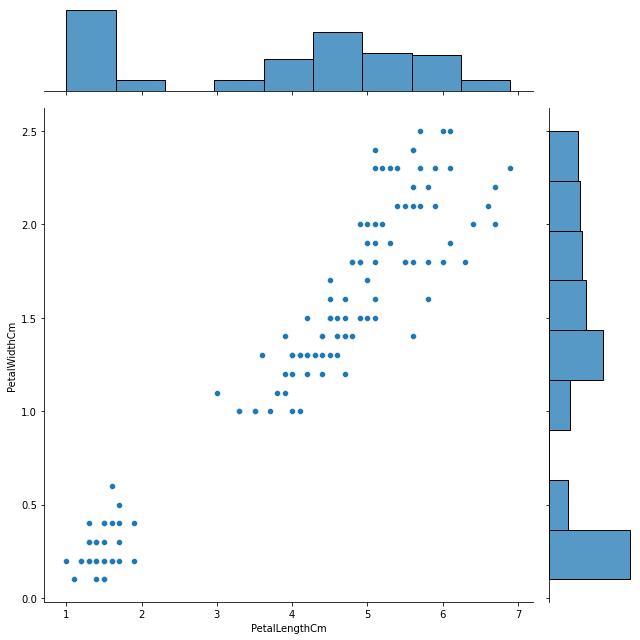

In [19]:
sns.jointplot(x="PetalLengthCm",y="PetalWidthCm",data=iris,height=9)

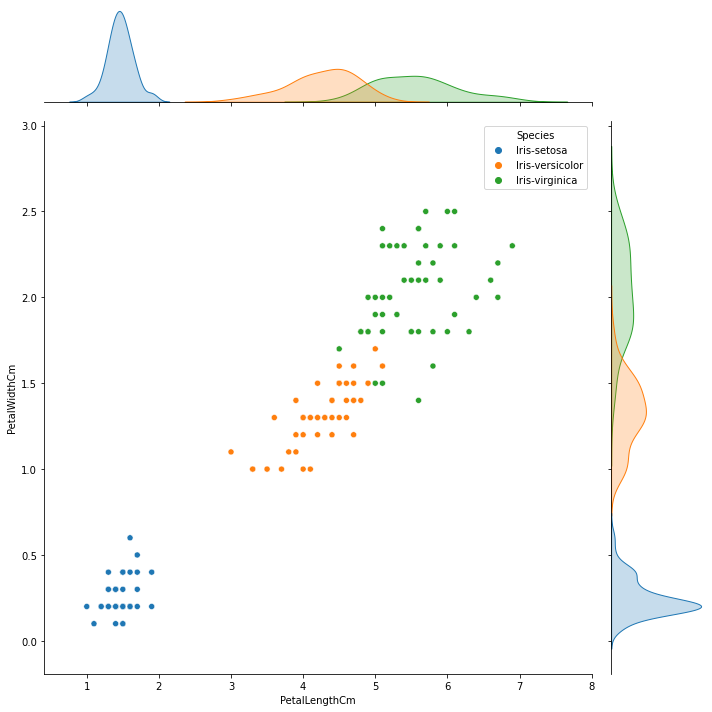

In [20]:
sns.jointplot(x="PetalLengthCm",y="PetalWidthCm",data=iris,height=10,hue='Species')

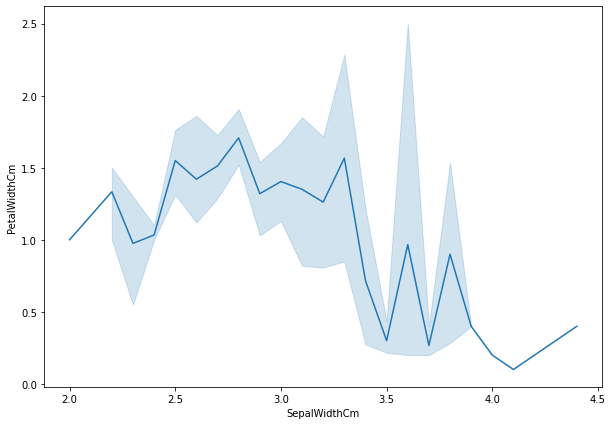

In [21]:
plt.figure(figsize=(10,7))
sns.lineplot(x='SepalWidthCm',y='PetalWidthCm',data=iris)
plt.show()

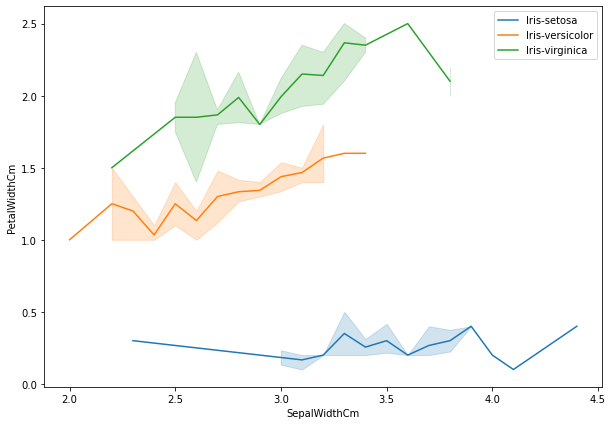

In [22]:
plt.figure(figsize=(10,7))
sns.lineplot(x='SepalWidthCm',y='PetalWidthCm',data=iris,hue='Species')
plt.legend()
plt.show()

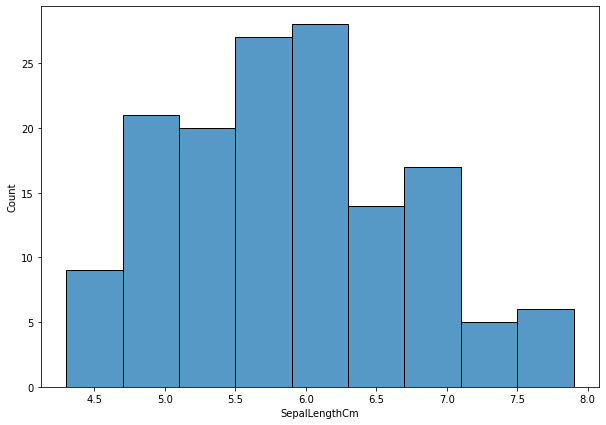

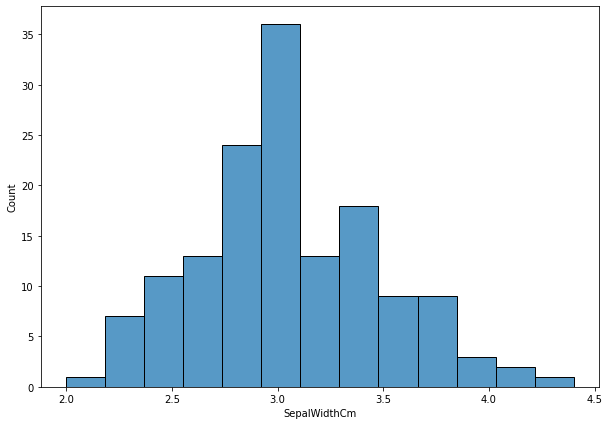

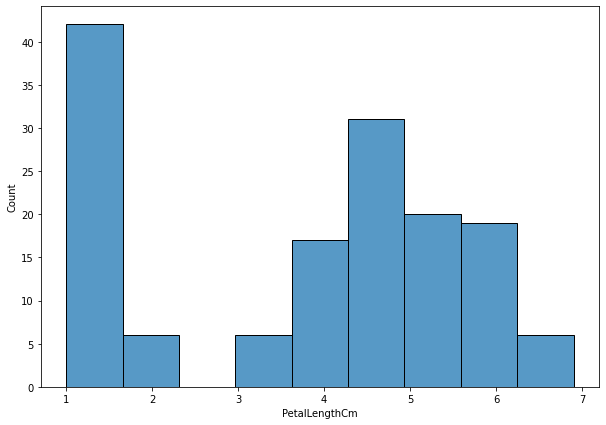

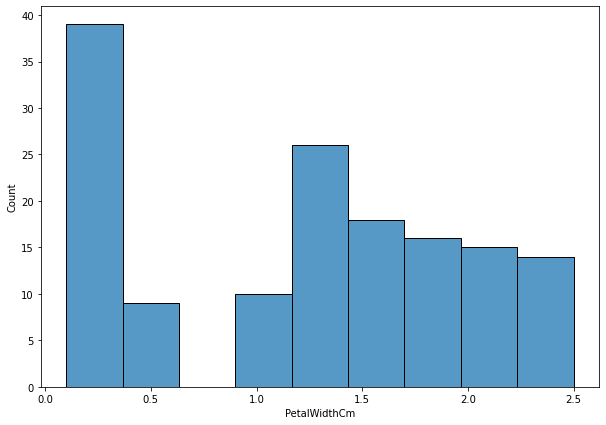

In [23]:
columns_name=iris.columns
columns_name=columns_name.drop('Species')
for c in columns_name:
 plt.figure(figsize=(10,7))
 sns.histplot(x=c,data=iris)
 plt.show()

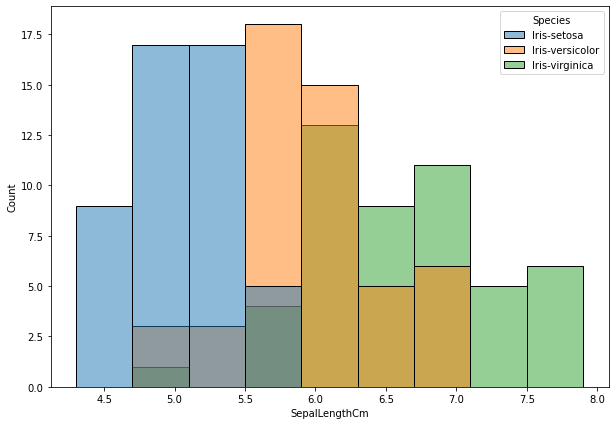

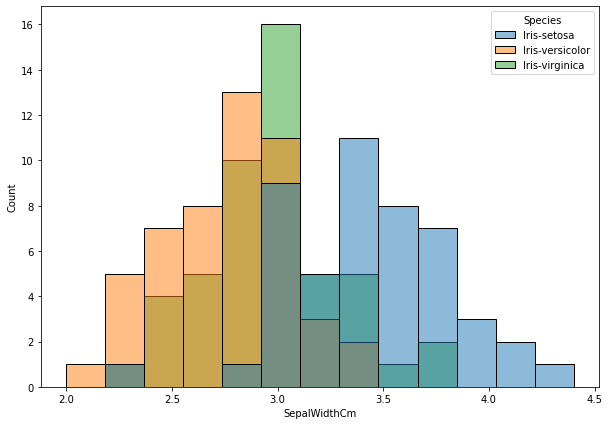

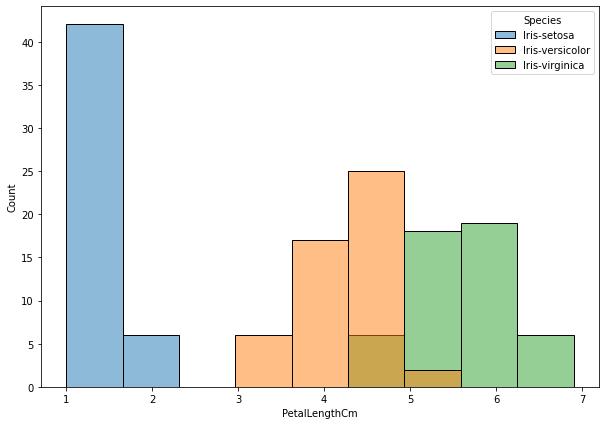

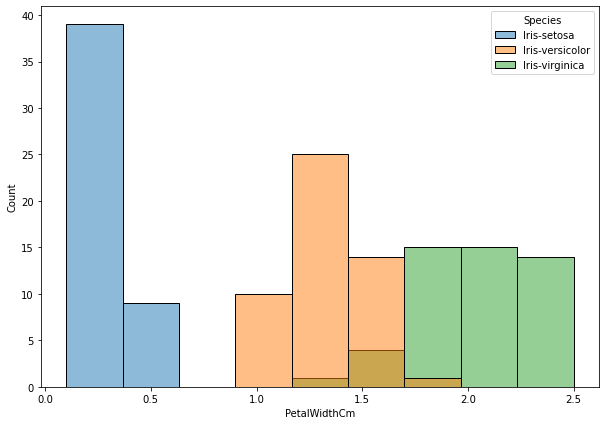

In [24]:
columns_name=iris.columns
columns_name=columns_name.drop('Species')
for c in columns_name:
 plt.figure(figsize=(10,7))
 sns.histplot(x=c,hue='Species',data=iris)
 plt.show()

# Train & Test Split

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x=iris.drop('Species',axis=1)
y=iris['Species']

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

# Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier 

In [29]:
dt=DecisionTreeClassifier()

In [30]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

# Prediction

In [31]:
predictions=dt.predict(x_test)
df1=x_test
df1 =df1.assign(Species=predictions)
print(df1)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm          Species
30             4.8           3.1            1.6           0.2      Iris-setosa
1              4.9           3.0            1.4           0.2      Iris-setosa
51             6.4           3.2            4.5           1.5  Iris-versicolor
129            7.2           3.0            5.8           1.6  Iris-versicolor
86             6.7           3.1            4.7           1.5  Iris-versicolor
104            6.5           3.0            5.8           2.2   Iris-virginica
84             5.4           3.0            4.5           1.5  Iris-versicolor
0              5.1           3.5            1.4           0.2      Iris-setosa
12             4.8           3.0            1.4           0.1      Iris-setosa
72             6.3           2.5            4.9           1.5  Iris-versicolor
137            6.4           3.1            5.5           1.8   Iris-virginica
134            6.1           2.6            5.6     

In [32]:
from sklearn.metrics import classification_report,confusion_matrix

In [33]:
print(classification_report(y_test,predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.92      1.00      0.96        12
 Iris-virginica       1.00      0.92      0.96        12

       accuracy                           0.97        37
      macro avg       0.97      0.97      0.97        37
   weighted avg       0.98      0.97      0.97        37



In [34]:
print(confusion_matrix(y_test,predictions))

[[13  0  0]
 [ 0 12  0]
 [ 0  1 11]]
